# Data Visualization of used Audi cars with various Plots

## First, we will use barplot and pie chart to visualize the data set

In [2]:
#importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
#reading the csv file as a pandas dataframe variable
df = pd.read_csv("audi.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


Here we can see, in this dataset there are three object type data or categorical data, model, transmission and fuelType. So, these three categorical data are suitable for making visualization with pie charts or bar chart. 

In [5]:
print(df["model"].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


But the model data type has too many types to be represented by a pie or bar chart

In [6]:
print(df["transmission"].unique())

['Manual' 'Automatic' 'Semi-Auto']


In [7]:
print(df["fuelType"].unique())

['Petrol' 'Diesel' 'Hybrid']


As we can see, transmission and fuelType both have three unique values. We know that pie charts are better to show two to three values. But let us do both pie chart and bar plot and then we will decide which type of data visualization is better.

First, let us show the transmission values using pie chart: 

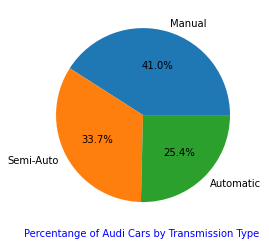

In [8]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=0) 

plt.xlabel("Percentange of Audi Cars by Transmission Type ").set_color('blue')
plt.ylabel("")
plt.show()

Now, let us see bar plot for the same values. But for that we need to create a separate dataframe from series for only transmission as we need to find the percentage of the cars first to create barplot. 

In [9]:
#converting data series to a data frame for future manipulation use 
df_transmission = pd.DataFrame(df["transmission"].value_counts())

#resetting and renaming index to show the dataframe properly 
df_transmission= df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

#finding the percentage of the cars
df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

#rounding the floating point values to ine digit
df_transmission = df_transmission.round(1)
display(df_transmission)


,transmission,no_of_cars,% of cars
0,Manual,4369,41.0
1,Semi-Auto,3591,33.7
2,Automatic,2708,25.4


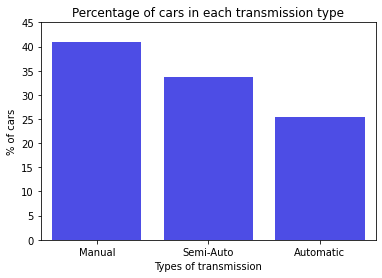

In [10]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="blue",
            alpha=0.8)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars in each transmission type")
plt.yticks(np.arange(0,46,5))

plt.show()

From my point of view, for transmission type it is better to use barplot than pie chart. Becasue from pie chart it is not easy to see the difference between the three values as they are close. For example, in the above pie chart the area of manual and semi-auto seems kind of same. 

Now, let us also see the pie chart and barplot for fuel type. 

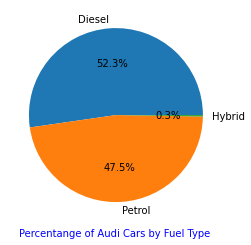

In [11]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=0)

plt.xlabel("Percentange of Audi Cars by Fuel Type ").set_color('blue')
plt.ylabel("")
plt.show()

In [12]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType= df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})
df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(1)
display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.3
1,Petrol,5063,47.5
2,Hybrid,28,0.3


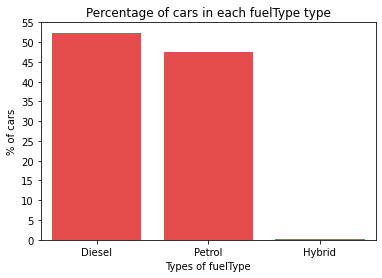

In [13]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuelType")
plt.ylabel("% of cars")
plt.title("Percentage of cars in each fuelType type")
plt.yticks(np.arange(0,56,5))

plt.show()

I think in the case of fuelType pie chart and barplot both are suitable. Because only two values are dominant and it is clear which value is bigger. 

# Now we will visualize the data set using Scatter Plot, Regression Plot and Pair Plot 

In [14]:
#we can use the correlation values to see only the numeric columns and the relation between them
correlation_matrix=df.corr()
display(correlation_matrix)

,year,price,mileage,mpg,engineSize
year,1.000000,0.592581,-0.789667,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,0.395103,0.070710
mpg,-0.351281,-0.600334,0.395103,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,-0.365621,1.000000


In [15]:
# needed this table to find out the min and max year becasue it was necessary to find this to arrange the xticks of years properly
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


### Creating Scatter Plot

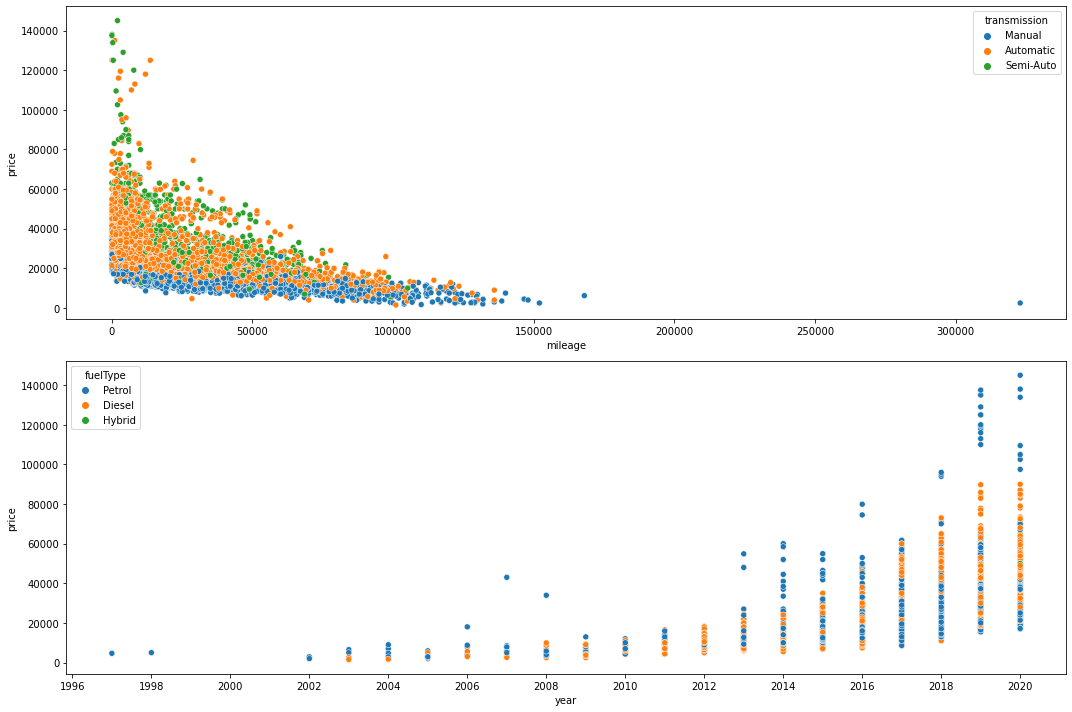

In [16]:
#first we should define the figure size in a tuple
plt.figure(figsize=(15,10))

#as we want to plot two scatter plot that's why we are using subplot where (number of rows, number of columns , position)
plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.subplot(2, 1, 2)
sns.scatterplot(x="year", y="price", data=df, hue="fuelType")
plt.xticks(np.arange(1996,2022,2))

#use tight_layout() to position the name of x-axis close to the plot 
plt.tight_layout()
plt.show()

As we know, in scatter plot we only use numeric categories in the x and y axis , besides we can use 'hue' to demonstrate a object type data. We try to predict a trend of the data by analyzing them. That's why I have used price in the y-axis, as we want to predict the price in cotrast to other numerical values, such as mileage, mpg(mile per gallon), engine size or year. 

I have tried all of this above mentioned possibilites and found out that only the mileage vs price and year vs price plot makes sense mostly. Because as we can see while the milage is increasing , the price of the cars decresing making a negative slope, as shown in the correlation table above(-0.535357).Also, by using transmission as hue we can see that the price of manual cars is the lowest , then the price of automatic and semi-automatic cars are mostly in the middle and higher price region. 

And, year and price have a positive correlation (0.592581), that is why we can see that the latest years' car prices are higher that the older, which is expected.And also it is seen that the price of the petrol cars are mostly higher. 

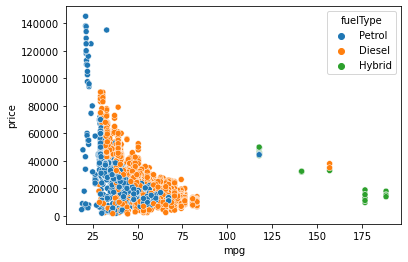

In [17]:
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")
plt.show()

Though, there are not much to show the relation between price and mpg in a scatterplot shown above, as nothing specifically be said from this. But sometimes these plot can be usful to find  that there are some wrong information in the data set. Because we can see some cars have mpg more than 100 which is not possible, and we can also see that these cars are mostly Hybrid type of cars. 

### Creating Regression Plot

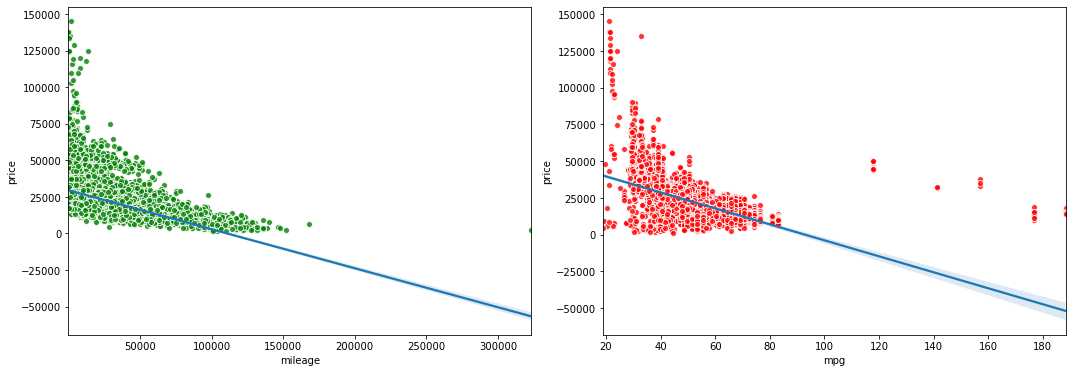

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
#we will use scatter_kws to change the color and edge of every data marker to visualize each data clearly
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"green", "edgecolor":"white"})

plt.subplot(2, 2, 2)
sns.regplot(x="mpg", y="price", data=df, scatter_kws={"color":"red", "edgecolor":"white"})

plt.tight_layout()
plt.show()

From  the above two regression plot we can see the data trend between mileage vs price and mpg vs price with the regression line.

In the first case of milage we can see that the data is condensed where the price is around 25000 , in case if mpg this price is in range between 25000 to 40000 and going downwards to 0. 

### Creating Pair Plot

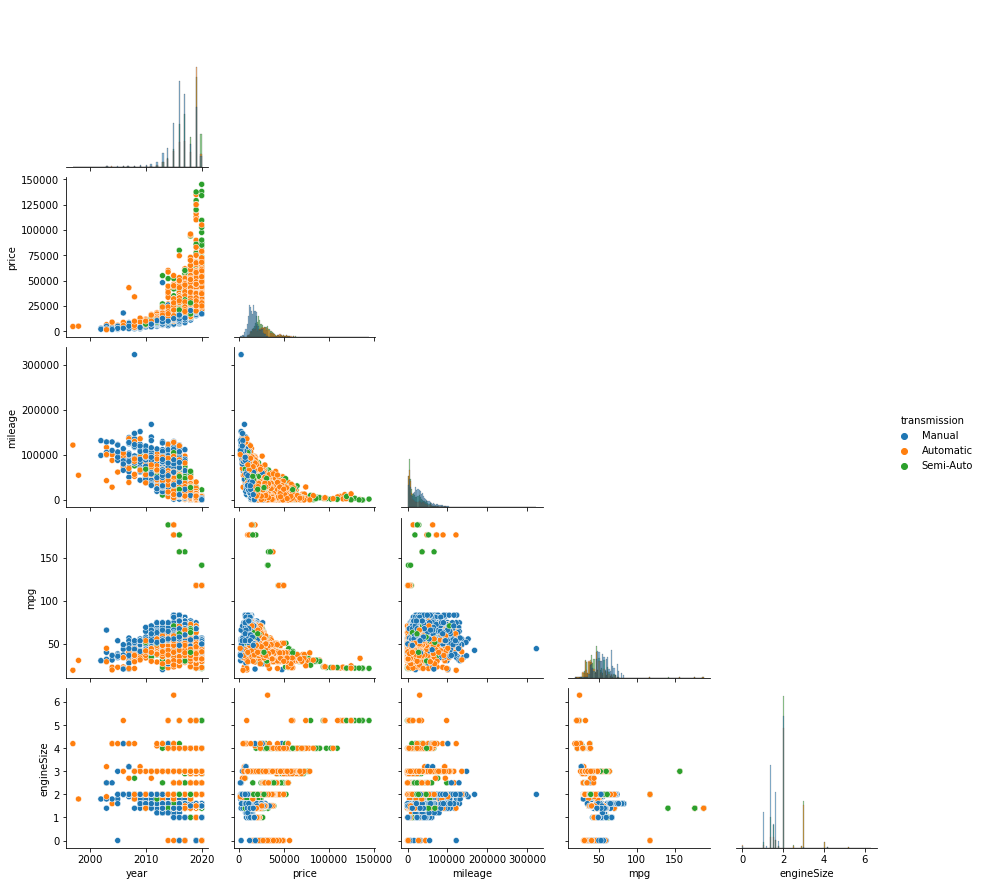

In [19]:
sns.pairplot(df, corner="True", hue="transmission", diag_kind="hist")
plt.show()

As we have discussed before that and also here can be seen that there are correlation between year and price , and also between milage and price. But some subtle correlation can also be seen in the plot of mpg vs price and mpg vs year. But these needs to be seen more accurately using individual scatter plot or any other type of plot.

So, it can be said that pair plots are very useful becasue we can realize the overall correlation (even if there is none or zero correlation ) between numeic columns of the dataset quickly from this. 

## Now we will visualize the data set using Histogram, Boxplot and Violin Plot

### Creating Histogram 

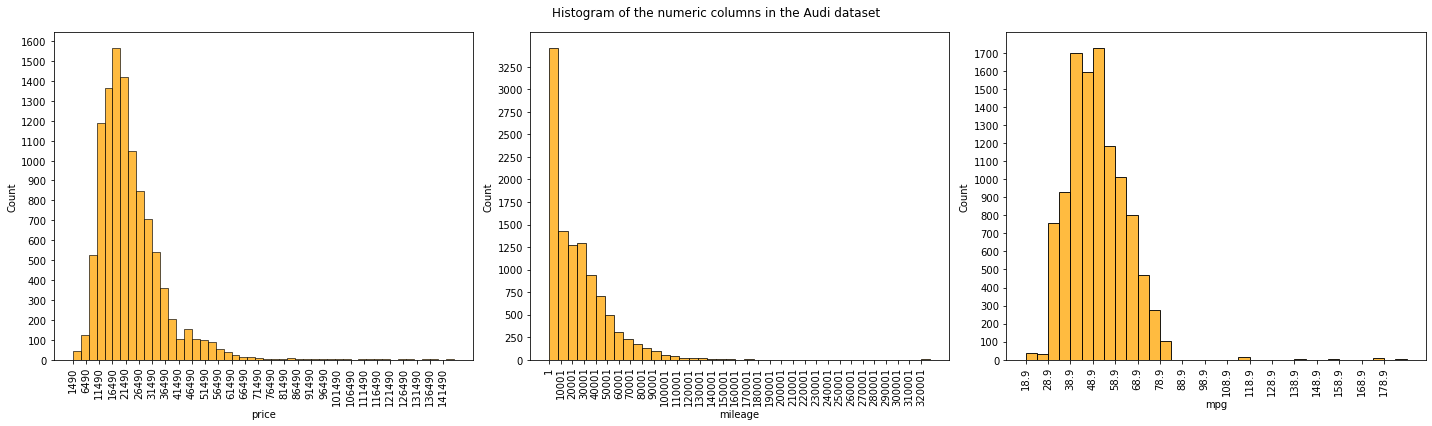

In [20]:
#first we should define the figure size in a tuple as there will be subplots
plt.figure(figsize=(20,6))


#subplot position(number of rows, number of columns , position)
plt.subplot(1,3,1)
#in y-axis there will be always count, we should decide what to show in x-axis, and decide about binsize to make the visualization easy to understand 
sns.histplot(x="price", data=df, binwidth=3000, color="orange")
#arranging x and y ticks accordingly, rotate the x/ticks as they were overlapping
plt.xticks(np.arange(df["price"].min(), df["price"].max(), 5000), rotation=90)
plt.yticks(np.arange(0,1700,100))

plt.subplot(1,3,2)
sns.histplot(x="mileage", data=df, binwidth=8000, color="orange")
plt.xticks(np.arange(df["mileage"].min(), df["mileage"].max(), 10000), rotation=90)
plt.yticks(np.arange(0,3500,250))



plt.subplot(1,3,3)
sns.histplot(x="mpg", data=df, binwidth=5, color="orange")
plt.xticks(np.arange(df["mpg"].min(), df["mpg"].max(), 10), rotation=90)
plt.yticks(np.arange(0,1750,100))



plt.suptitle("Histogram of the numeric columns in the Audi dataset")
plt.tight_layout()
plt.show()

Though there are total 5 numerical data columns in this data set, but the histogram for year and enginesize does not convey any meaningful visualization. 

In the above three visualization, we can easily see how many cars in what range of price, mileage and mpg. Though it was necessary to set their binsize accordingly to make the visualization meaningful. 

For example, in the price vs count histogram it can be seen that, the most number of cars' price are between around 7000 to 40000 (USD, I suppose). and we can also sum the count of every beans to find an approximation. Like, in the previous mentioned range there are approximate 9500 cars.  

Similarly from the mileage vs count histogram it can be said, most numbers of cars have mileage below 10000, and it is around 3500 cars. And , also can be seen that the mileage decreases after 50000 significantly. 

And from the third unimodal histogram of mpg vs count, it can be seen that most number of cars have mpg between 30 to 80. As such may more useful data can be extracted from these histograms. 

### Creating Boxplot

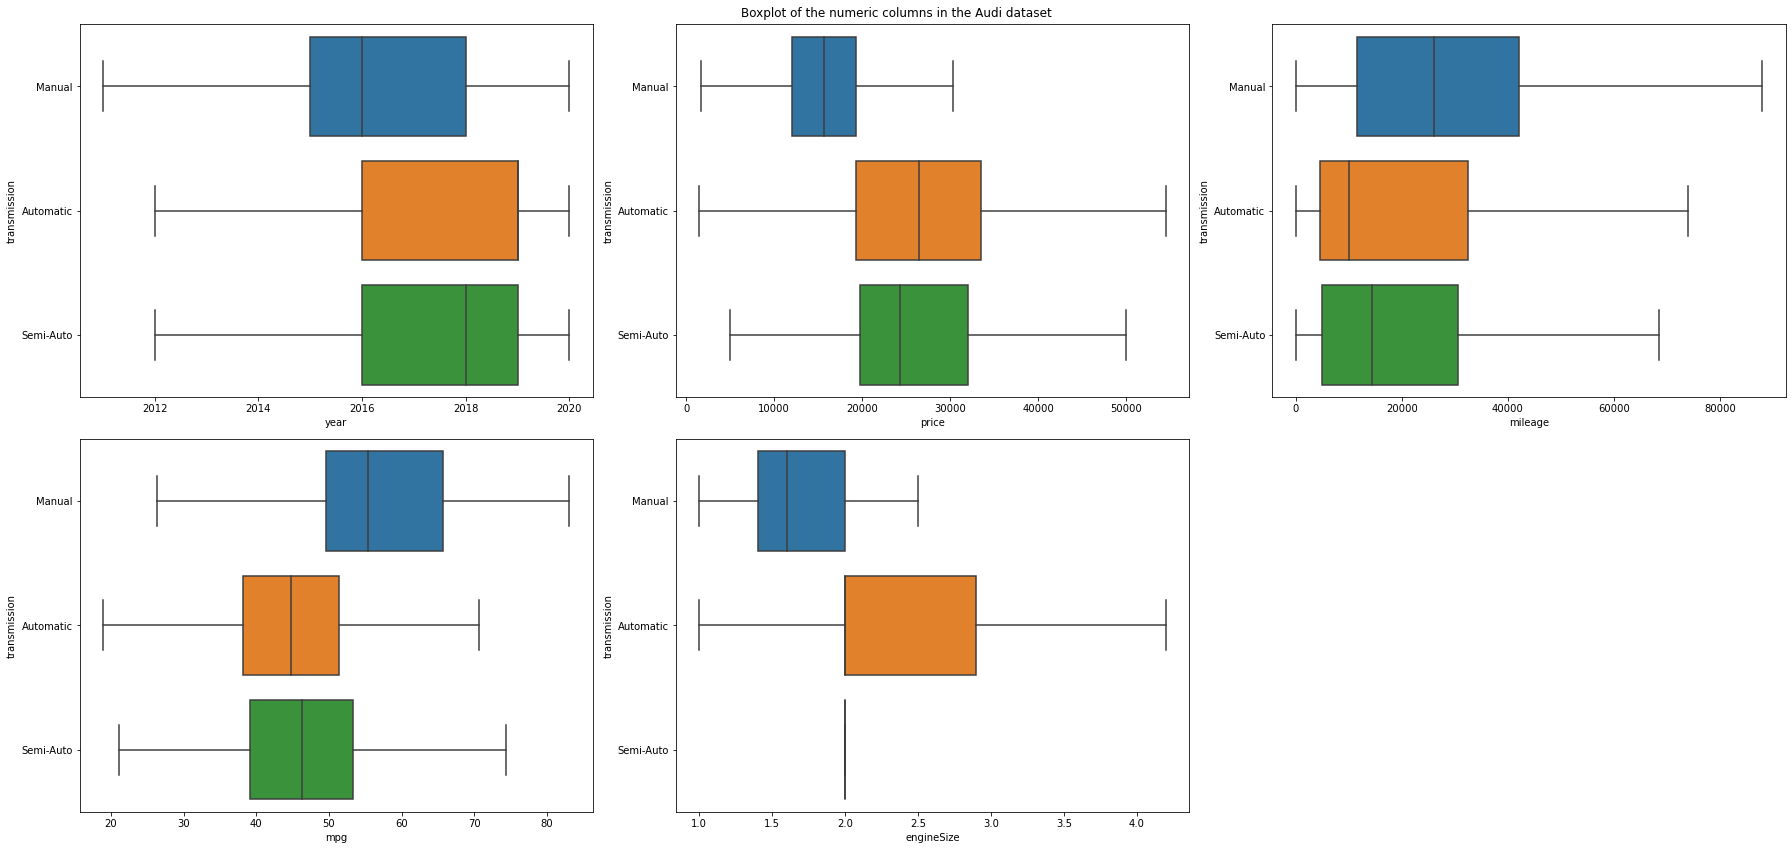

In [30]:

# for appending only the numerical columns
num_cols = []
for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)

plt.figure(figsize=(25,12))

#creating a loop to show all numerical columns data as boxplot
for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[num_cols[index]], showfliers=False, y=df["transmission"])

plt.suptitle("Boxplot of the numeric columns in the Audi dataset")
plt.tight_layout()
plt.show()

From the above boxplots we can find out different type of realization of the dataset. For example, in the year we can see that, for all three type of transmissions, most of the cars are from 2015 to 2019.

But some significant data can be extracted from price, mpg and enginesize's boxplot. In the boxplot of price, we can see that the price of most manual cars are the lowest, from 10000 to 20000. Whereas price of most automatic and semi-automatic cars are almost same , in the range of 20000 to 30000. And for all three cases medians are in this 2th to 75th percentile range. 

In case of mpg's boxplot it can be seen that, 25th to 75th percentile of the cars are in 40 to 50 range for automatic and semi-automatic cars , but for  manual car the range is between 50 to 70. 

For mileage we can see that, all of the semi-automatic cars' engine size are almost 2. But for manual cars the value is between 1.5 to 2, and the median is close to 25th percentile. For, automatic cars, that range is from 2 to 3 , but the median is not present in this range. 

### Creating Violin Plot

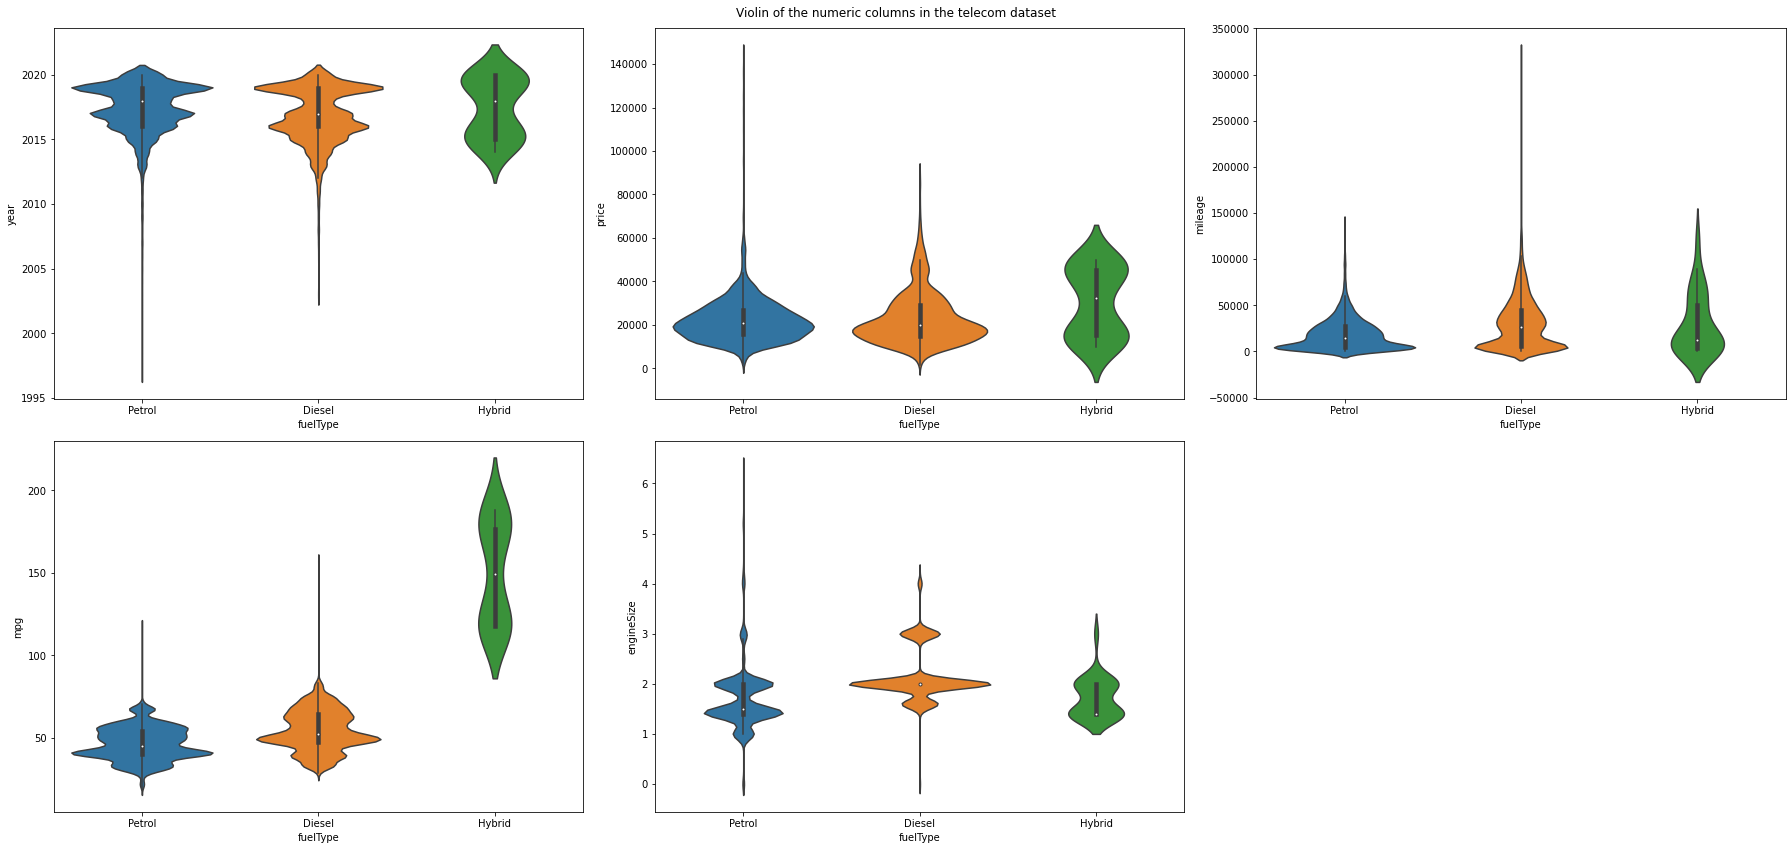

In [28]:
num_cols = []

for col in df.columns:
    if df[col].dtypes != "O":
        num_cols.append(col)

plt.figure(figsize=(25,12)

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=df[num_cols[index]], x=df["fuelType"], showfliers=False)

plt.suptitle("Violin of the numeric columns in the telecom dataset")
plt.tight_layout()
plt.show()

Though because of representing all three fuel types, may be the plot look little bit confusing for some people, but some important conclusion can be reached by these plots. 

For example , in case of mpg, we can see that,most of the petrol and diesel type cars are 0 to 75 mpg region. Whereas Hybrid cars are in the range of 100 to 200 range. 

Also, in case of engine size, it can be seen that Prtrol cars' engine size can vary from 0 to 6, but for diesel and hybrid this range is short. Same applies in case of year. From the year's violin plot we can realize when the demand of different type fuel cars were how much.

From my point of view, boxplot and violin plot both are very effective, meaningfull and useful, but we need to be cautious in which case which plot suits better. For example, above, I though it is more useful to use violin plot for fuel type, that's why I used it. 